In [21]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [22]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

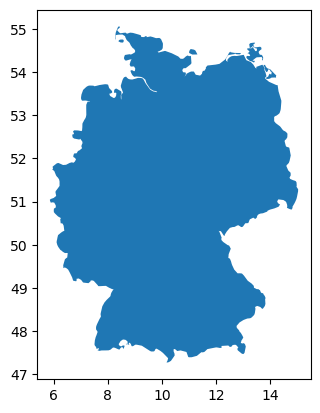

In [25]:
alemania=countries[countries.COUNTRY=='Germany']

alemania.plot()


<Axes: >

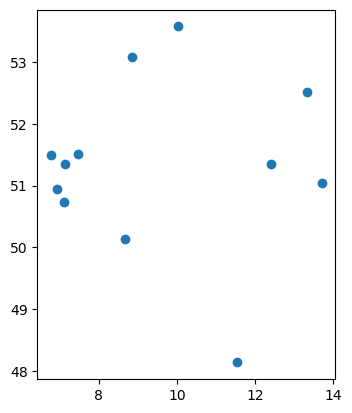

In [26]:
ciudades_alemania=cities[cities.COUNTRY=='Germany']

ciudades_alemania.plot()

<Axes: >

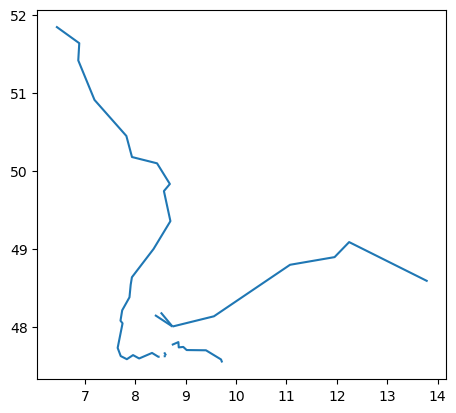

In [27]:
rios_alemania=gpd.clip(gdf=rivers, mask=alemania)

rios_alemania.plot()

In [28]:
alemania_coordenada=[52.52437, 13.41053]

In [29]:
alemania.to_crs(4839).crs.axis_info

[Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

<Axes: >

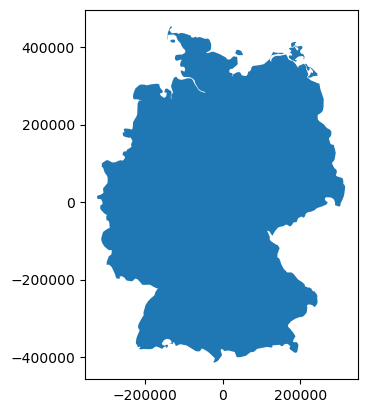

In [30]:
alemania.to_crs(4839).plot()

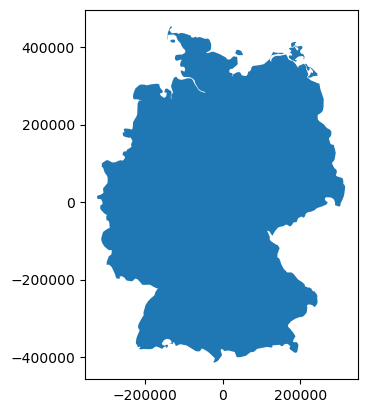

In [31]:
mapabase4839=alemania.to_crs(4839).plot()

#alemania.to_crs(4839).centroid.plot(color='pink',ax=mapabase4839)

<Axes: >

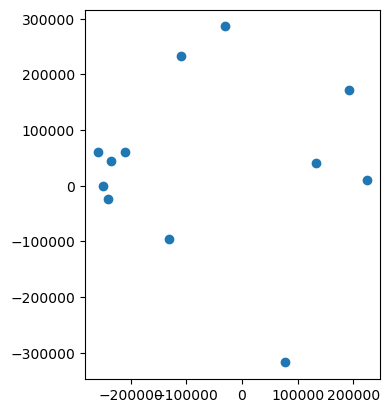

In [32]:
alemania4839=alemania.to_crs(4839)
ciudades_alemania=cities[cities.COUNTRY=='Germany']
ciudades4839=ciudades_alemania.to_crs(alemania4839.crs)

ciudades4839.plot()

<Axes: >

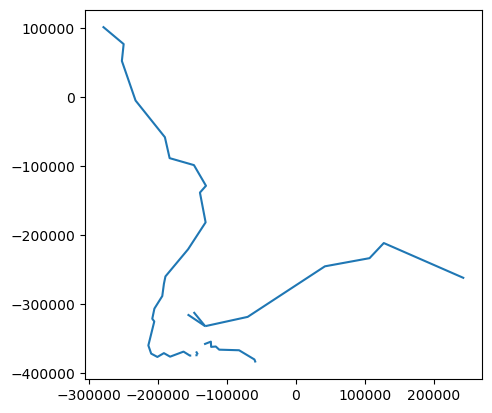

In [33]:
rios4839=rivers.to_crs(alemania4839.crs)
rios4839=gpd.clip(gdf=rios4839, mask=alemania4839)

rios4839.plot()

<Axes: >

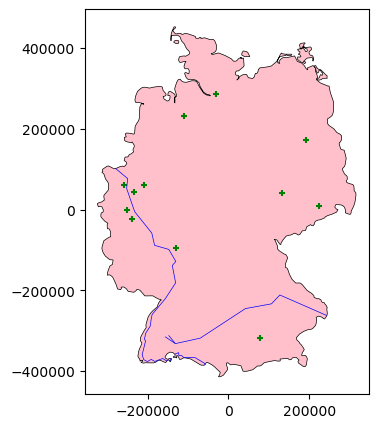

In [34]:
mapabase=alemania4839.plot(facecolor='pink',edgecolor='black',linewidth=0.5,figsize=(5,5))
ciudades4839.plot(marker='+',color='green', markersize=16,ax=mapabase)
rios4839.plot(edgecolor='blue',linewidth=0.5,ax=mapabase)

In [35]:
alemania_coordenada=[52.52437, 13.41053]

In [38]:
import folium
m=ciudades4839.explore(location=alemania_coordenada,zoom_start=5,tiles='cartoDB positron',color='pink', name="cities")

m=rios4839.explore(m=m,color='blue',name="rivers")

folium.LayerControl().add_to(m)

m

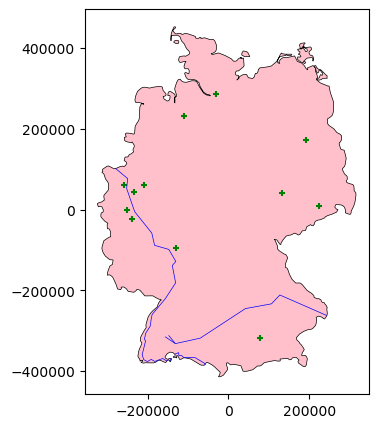

In [20]:
import matplotlib.pyplot as plt

mapabase=alemania4839.plot(facecolor='pink',edgecolor='black',linewidth=0.5,figsize=(5,5))
mapa2=ciudades4839.plot(marker='+',color='green', markersize=16,ax=mapabase)
mapa3=rios4839.plot(edgecolor='blue',linewidth=0.5,ax=mapabase)

plt.savefig(os.path.join("figures",'mapa3.jpg'))

In [40]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

In [41]:
worldMaps='https://github.com/Romina300/simpleplot/raw/main/maps/worldMaps.gpkg'

In [42]:
from  fiona import listlayers

listlayers(worldMaps)

['countries', 'cities', 'rivers']

In [44]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

In [46]:
import os

alemania4839.to_file(os.path.join("maps","alemania4839","alemaniaMaps4839.gpkg"), layer='country', driver="GPKG")
ciudades4839.to_file(os.path.join("maps","alemania4839","alemaniaMaps4839.gpkg"), layer='cities', driver="GPKG")
rios4839.to_file(os.path.join("maps","alemania4839","alemaniaMaps4839.gpkg"), layer='rivers', driver="GPKG")


DriverError: sqlite3_open(maps\alemania4839\alemaniaMaps4839.gpkg) failed: unable to open database file

In [ ]:
#countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
#cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
#rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")